In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [3]:
df = pd.read_csv('summary.csv', encoding='ISO-8859-1')

In [4]:
# Update the 'Country' column where 'Country_Code' is 'ROC'

df.loc[df['Country_Code'] == 'ROC', 'Country'] = 'Russia'

# Verify the update
print(df[df['Country_Code'] == 'ROC'])

     Year Country  Total_Medals  Gold_Medals  Silver_Medals  Bronze_Medals  \
539  2020  Russia            71           20             28             23   

     Total_Athletes  Events_Count  Host_or_Not Country_Code  population_total  \
539             318           204            0          ROC         145245148   

     population_growth  GNI_per_capita           GDP  GDP_growth  \
539          -0.143202           10660  1.493080e+12   -2.653655   

                      Region  GDP_per_capita  Population_Percentage  \
539  Europe and Central Asia     10108.32715               0.018664   

     GDP_Percentage    HDI  
539        0.017661  0.824  


In [5]:
df2 = df.copy()

In [5]:
df2

,Year,Country,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Athletes,Events_Count,Host_or_Not,Country_Code,population_total,population_growth,GNI_per_capita,GDP,GDP_growth,Region,GDP_per_capita,Population_Percentage,GDP_Percentage,HDI
0,2008,Afghanistan,1,0,0,1,4,4,0,AFG,26427200,2.002330,370,1.010930e+10,3.924980,South Asia,382.534000,0.003906,0.000159,0.437
1,2012,Afghanistan,1,0,0,1,6,6,0,AFG,30466500,4.077630,640,1.990730e+10,12.752300,South Asia,653.417000,0.004288,0.000265,0.482
2,1992,Algeria,2,1,0,1,35,27,0,ALG,26748300,2.323750,1920,4.800310e+10,1.800000,Middle East and North Africa,1794.620000,0.004918,0.001912,0.587
3,1996,Algeria,3,2,0,1,45,29,0,ALG,28984600,1.763320,1530,4.694160e+10,4.100000,Middle East and North Africa,1619.530000,0.005015,0.001489,0.608
4,2000,Algeria,5,1,1,3,47,42,0,ALG,30774600,1.402290,1610,5.479040e+10,3.800000,Middle East and North Africa,1780.380000,0.005036,0.001637,0.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,0,1,14,6,0,GHA,32180401,2.066269,2230,7.004310e+10,0.513942,Sub-Saharan Africa,2176.576218,0.004135,0.000829,0.611
622,2020,Grenada,1,0,0,1,6,2,0,GRD,123663,0.762219,7890,1.043411e+09,-13.756622,Latin America and Caribbean,8437.536782,0.000016,0.000012,0.779
623,2020,Kuwait,1,0,0,1,10,4,0,KWT,4360444,-1.832821,32790,1.075130e+11,-5.274021,Middle East and North Africa,24656.433710,0.000560,0.001272,0.806
624,2020,Moldova,1,0,0,1,19,16,0,MDA,2635130,-1.098032,4360,1.153075e+10,-8.275978,Europe and Central Asia,4375.778893,0.000339,0.000136,0.769


In [7]:
train_df = df[df['Year'].between(1992, 2016)]
test_df = df[df['Year'] == 2020]


In [8]:
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'


In [9]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
numeric_transformer = StandardScaler()


In [10]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Region']
categorical_transformer = OneHotEncoder()


In [11]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [12]:
y_train_normalized = StandardScaler().fit_transform(train_df[[target]])


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train = train_df[features]
model_normalized.fit(X_train, y_train_normalized)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Total_Athletes',
                                                   'Events_Count',
                                                   'population_total',
                                                   'GNI_per_capita', 'GDP',
                                                   'GDP_per_capita',
                                                   'population_growth',
                                                   'GDP_growth']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Region'])])),
                ('regressor', LinearRegression())])

### Linear Regression 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load your data
# df = pd.read_csv('your_data.csv')

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Fit the scaler on the training target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

# Define the model
model_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_normalized.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_normalized.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized)

# Model 2: Non-Normalized Total_Medals
model_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_non_normalized.predict(X_test)

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Normalized': y_pred_normalized.flatten()
})

results_df_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Normalized Model:")
print(results_df_normalized)

print("\nResults for Non-Normalized Model:")
print(results_df_non_normalized)

# Evaluate models
print("Model 1 RMSE (Normalized):", mean_squared_error(actual_values, y_pred_normalized.flatten(), squared=False))
print("Model 2 RMSE (Non-Normalized):", mean_squared_error(actual_values, y_pred_non_normalized, squared=False))


Results for Normalized Model:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_Normalized
0           USA                  113                         127.210595
1           CHN                   88                         100.058908
2           JPN                   58                          70.255420
3           GBR                   65                          40.097086
4           ROC                   71                          34.387082
..          ...                  ...                                ...
86          GHA                    1                           0.619748
87          GRD                    1                          -5.306762
88          KWT                    1                          -6.750108
89          MDA                    1                          -0.616542
90          SYR                    1                          -0.486559

[91 rows x 3 columns]

Results for Non-Normalized Model:
   Country_Code  Actual_Total_Medals  Predicted_

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# df = pd.read_csv('your_data.csv')

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
            'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 
            'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code' 

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
                    'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Fit the scaler on the training target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

# Define the normalized model
model_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the normalized model
model_normalized.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform for normalized model
y_pred_normalized = model_normalized.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized)

# Model 2: Non-Normalized Total_Medals
model_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the non-normalized model
model_non_normalized.fit(X_train, y_train)

# Predict for non-normalized model
y_pred_non_normalized = model_non_normalized.predict(X_test)

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create DataFrames with predicted and actual values along with country codes
results_df_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Normalized': y_pred_normalized.flatten()
})

results_df_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Normalized Model:")
print(results_df_normalized)

print("\nResults for Non-Normalized Model:")
print(results_df_non_normalized)

# Evaluate models for normalized model
rmse_normalized = mean_squared_error(actual_values, y_pred_normalized.flatten(), squared=False)
print("Model 1 RMSE (Normalized):", rmse_normalized)

# Calculate R-squared and other metrics for normalized model
r_squared_normalized = r2_score(actual_values, y_pred_normalized.flatten())
n_test = len(actual_values)  # Number of observations in test set
k = X_test.shape[1]  # Number of predictors

# Adjusted R-squared for normalized model
adjusted_r_squared_normalized = 1 - (1 - r_squared_normalized) * (n_test - 1) / (n_test - k - 1)

# Standard Error for normalized model
standard_error_normalized = np.sqrt(np.sum((actual_values - y_pred_normalized.flatten())**2) / (n_test - k))

# Calculate MSE for training set (for normalized model)
y_train_pred_normalized = model_normalized.predict(X_train)
train_mse_normalized = mean_squared_error(y_train, scaler_y.inverse_transform(y_train_pred_normalized.flatten().reshape(-1, 1)))

# Print additional metrics for normalized model
print(f'Test Set Multiple R (Normalized): {np.sqrt(r_squared_normalized)}')  # R is the square root of R²
print(f'Test Set R-squared (R²) (Normalized): {r_squared_normalized}')
print(f'Test Set Adjusted R-squared (Normalized): {adjusted_r_squared_normalized}')
print(f'Test Set Standard Error (Normalized): {standard_error_normalized}')
print(f'Training Set Mean Squared Error (MSE) (Normalized): {train_mse_normalized}')

# Evaluate models for non-normalized model
rmse_non_normalized = mean_squared_error(actual_values, y_pred_non_normalized, squared=False)
print("Model 2 RMSE (Non-Normalized):", rmse_non_normalized)

# Calculate R-squared and other metrics for non-normalized model
r_squared_non_normalized = r2_score(actual_values, y_pred_non_normalized)
# Adjusted R-squared for non-normalized model
adjusted_r_squared_non_normalized = 1 - (1 - r_squared_non_normalized) * (n_test - 1) / (n_test - k - 1)

# Standard Error for non-normalized model
standard_error_non_normalized = np.sqrt(np.sum((actual_values - y_pred_non_normalized)**2) / (n_test - k))

# Calculate MSE for training set (for non-normalized model)
y_train_pred_non_normalized = model_non_normalized.predict(X_train)
train_mse_non_normalized = mean_squared_error(y_train, y_train_pred_non_normalized)

# Print additional metrics for non-normalized model
print(f'Test Set Multiple R (Non-Normalized): {np.sqrt(r_squared_non_normalized)}')  # R is the square root of R²
print(f'Test Set R-squared (R²) (Non-Normalized): {r_squared_non_normalized}')
print(f'Test Set Adjusted R-squared (Non-Normalized): {adjusted_r_squared_non_normalized}')
print(f'Test Set Standard Error (Non-Normalized): {standard_error_non_normalized}')
print(f'Training Set Mean Squared Error (MSE) (Non-Normalized): {train_mse_non_normalized}')


Results for Normalized Model:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_Normalized
0           USA                  113                         127.210595
1           CHN                   88                         100.058908
2           JPN                   58                          70.255420
3           GBR                   65                          40.097086
4           ROC                   71                          34.387082
..          ...                  ...                                ...
86          GHA                    1                           0.619748
87          GRD                    1                          -5.306762
88          KWT                    1                          -6.750108
89          MDA                    1                          -0.616542
90          SYR                    1                          -0.486559

[91 rows x 3 columns]

Results for Non-Normalized Model:
   Country_Code  Actual_Total_Medals  Predicted_

### Ridge Regression

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Ridge Regression with Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Fit the scaler on the training target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

# Define the Ridge model
model_ridge_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # You can specify alpha for regularization strength
])

# Train the model
model_ridge_normalized.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_ridge_normalized.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized)

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model 2: Ridge Regression without Normalizing Total_Medals
model_ridge_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # You can specify alpha for regularization strength
])

# Train the model
model_ridge_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_ridge_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Normalized': y_pred_normalized
})

results_df_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Ridge Regression with Normalized Total_Medals:")
print(results_df_normalized)

print("\nResults for Ridge Regression without Normalized Total_Medals:")
print(results_df_non_normalized)

# Evaluate models
print("Model 1 RMSE (Normalized):", mean_squared_error(actual_values, y_pred_normalized, squared=False))
print("Model 2 RMSE (Non-Normalized):", mean_squared_error(actual_values, y_pred_non_normalized, squared=False))


Results for Ridge Regression with Normalized Total_Medals:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_Normalized
0           USA                  113                         127.179596
1           CHN                   88                          99.720815
2           JPN                   58                          69.607657
3           GBR                   65                          39.902660
4           ROC                   71                          34.609391
..          ...                  ...                                ...
86          GHA                    1                           0.544368
87          GRD                    1                           0.000000
88          KWT                    1                           0.000000
89          MDA                    1                           0.000000
90          SYR                    1                           0.000000

[91 rows x 3 columns]

Results for Ridge Regression without Normalized Total

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
            'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 
            'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
                    'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train and prepare both models
X_train = train_df[features]
y_train = train_df[target]

# Model with normalized target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

# Define the Ridge model
model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train the model
model_ridge.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_ridge.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized)

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model without normalizing target
model_ridge_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train the non-normalized model
model_ridge_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_ridge_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create DataFrame with predicted and actual values along with country codes
results_df = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Normalized': y_pred_normalized,
    'Predicted_Total_Medals_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Ridge Regression:")
print(results_df)

# Evaluate models
for model_type, y_pred in zip(['Normalized', 'Non-Normalized'], [y_pred_normalized, y_pred_non_normalized]):
    rmse = mean_squared_error(actual_values, y_pred, squared=False)
    r_squared = r2_score(actual_values, y_pred)
    n_test = len(actual_values)
    k = X_test.shape[1]

    # Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * (n_test - 1) / (n_test - k - 1)

    # Standard Error
    standard_error = np.sqrt(np.sum((actual_values - y_pred) ** 2) / (n_test - k))

    # Calculate MSE for training set
    if model_type == 'Normalized':
        y_train_pred = model_ridge.predict(X_train)
        y_train_pred = scaler_y.inverse_transform(y_train_pred)
    else:
        y_train_pred = model_ridge_non_normalized.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred)

    # Print additional metrics
    print(f"\nMetrics for {model_type} Model:")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R²): {r_squared}")
    print(f"Adjusted R-squared: {adjusted_r_squared}")
    print(f"Standard Error: {standard_error}")
    print(f"Training Set Mean Squared Error (MSE): {train_mse}")


Results for Ridge Regression:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_Normalized  \
0           USA                  113                         127.179596   
1           CHN                   88                          99.720815   
2           JPN                   58                          69.607657   
3           GBR                   65                          39.902660   
4           ROC                   71                          34.609391   
..          ...                  ...                                ...   
86          GHA                    1                           0.544368   
87          GRD                    1                           0.000000   
88          KWT                    1                           0.000000   
89          MDA                    1                           0.000000   
90          SYR                    1                           0.000000   

    Predicted_Total_Medals_Non_Normalized  
0                        

### Poisson Regression 

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Poisson Regression with Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Define the Poisson model
model_poisson_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', PoissonRegressor())  # No alpha parameter needed for PoissonRegressor
])

# Train the model
model_poisson_normalized.fit(X_train, y_train)

# Prepare test data
X_test = test_df[features]

# Predict
y_pred_poisson_normalized = model_poisson_normalized.predict(X_test)

# Enforce non-negative predictions (for Poisson, this should already be non-negative)
y_pred_poisson_normalized = pd.DataFrame(y_pred_poisson_normalized).clip(lower=0).values.flatten()

# Model 2: Poisson Regression without Normalizing Total_Medals
model_poisson_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', PoissonRegressor())  # No alpha parameter needed for PoissonRegressor
])

# Train the model
model_poisson_non_normalized.fit(X_train, y_train)

# Predict
y_pred_poisson_non_normalized = model_poisson_non_normalized.predict(X_test)

# Enforce non-negative predictions (for Poisson, this should already be non-negative)
y_pred_poisson_non_normalized = pd.DataFrame(y_pred_poisson_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df_poisson_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Poisson_Normalized': y_pred_poisson_normalized
})

results_df_poisson_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Poisson_Non_Normalized': y_pred_poisson_non_normalized
})

# Print results
print("Results for Poisson Regression with Normalized Total_Medals:")
print(results_df_poisson_normalized)

print("\nResults for Poisson Regression without Normalizing Total_Medals:")
print(results_df_poisson_non_normalized)

# Evaluate models
print("Model 1 RMSE (Poisson Normalized):", mean_squared_error(actual_values, y_pred_poisson_normalized, squared=False))
print("Model 2 RMSE (Poisson Non-Normalized):", mean_squared_error(actual_values, y_pred_poisson_non_normalized, squared=False))


Results for Poisson Regression with Normalized Total_Medals:
   Country_Code  Actual_Total_Medals  \
0           USA                  113   
1           CHN                   88   
2           JPN                   58   
3           GBR                   65   
4           ROC                   71   
..          ...                  ...   
86          GHA                    1   
87          GRD                    1   
88          KWT                    1   
89          MDA                    1   
90          SYR                    1   

    Predicted_Total_Medals_Poisson_Normalized  
0                                  150.561741  
1                                   86.970761  
2                                   76.522679  
3                                   31.066503  
4                                   37.534152  
..                                        ...  
86                                   2.717071  
87                                   2.580339  
88                        

### Support Vector Regression (SVR)

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: SVR with Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Fit the scaler on the training target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1)).flatten()

# Define the SVR model
model_svr_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))  # You can use different kernels like 'linear', 'poly', 'rbf'
])

# Train the model
model_svr_normalized.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_svr_normalized.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model 2: SVR without Normalizing Total_Medals
model_svr_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))  # You can use different kernels like 'linear', 'poly', 'rbf'
])

# Train the model
model_svr_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_svr_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df_svr_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_SVR_Normalized': y_pred_normalized
})

results_df_svr_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_SVR_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for SVR with Normalized Total_Medals:")
print(results_df_svr_normalized)

print("\nResults for SVR without Normalized Total_Medals:")
print(results_df_svr_non_normalized)

# Evaluate models
print("Model 1 RMSE (SVR Normalized):", mean_squared_error(actual_values, y_pred_normalized, squared=False))
print("Model 2 RMSE (SVR Non-Normalized):", mean_squared_error(actual_values, y_pred_non_normalized, squared=False))


Results for SVR with Normalized Total_Medals:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_SVR_Normalized
0           USA                  113                              48.788875
1           CHN                   88                              41.936771
2           JPN                   58                              45.004033
3           GBR                   65                              28.965262
4           ROC                   71                              34.652056
..          ...                  ...                                    ...
86          GHA                    1                               2.588372
87          GRD                    1                               6.698273
88          KWT                    1                               5.707644
89          MDA                    1                               0.774384
90          SYR                    1                               2.256911

[91 rows x 3 columns]

Results for SVR wi

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
            'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 
            'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
                    'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train and prepare both models
X_train = train_df[features]
y_train = train_df[target]

# Model with normalized target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

# Define the SVR model
model_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))  # You can change the kernel as needed
])

# Train the normalized model
model_svr.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_svr.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model without normalizing target
model_svr_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))  # You can change the kernel as needed
])

# Train the non-normalized model
model_svr_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_svr_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create DataFrame with predicted and actual values along with country codes
results_df = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Normalized': y_pred_normalized,
    'Predicted_Total_Medals_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Support Vector Regression:")
print(results_df)

# Evaluate models
for model_type, y_pred in zip(['Normalized', 'Non-Normalized'], [y_pred_normalized, y_pred_non_normalized]):
    rmse = mean_squared_error(actual_values, y_pred, squared=False)
    r_squared = r2_score(actual_values, y_pred)
    n_test = len(actual_values)
    k = X_test.shape[1]

    # Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * (n_test - 1) / (n_test - k - 1)

    # Standard Error
    standard_error = np.sqrt(np.sum((actual_values - y_pred) ** 2) / (n_test - k))

    # Calculate MSE for training set
    if model_type == 'Normalized':
        y_train_pred = model_svr.predict(X_train)
        y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    else:
        y_train_pred = model_svr_non_normalized.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred)

    # Print additional metrics
    print(f"\nMetrics for {model_type} Model:")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R²): {r_squared}")
    print(f"Adjusted R-squared: {adjusted_r_squared}")
    print(f"Standard Error: {standard_error}")
    print(f"Training Set Mean Squared Error (MSE): {train_mse}")


Results for Support Vector Regression:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_Normalized  \
0           USA                  113                         132.754792   
1           CHN                   88                          93.660928   
2           JPN                   58                          68.159232   
3           GBR                   65                          38.955412   
4           ROC                   71                          31.405029   
..          ...                  ...                                ...   
86          GHA                    1                           1.215020   
87          GRD                    1                           0.000000   
88          KWT                    1                           0.000000   
89          MDA                    1                           0.000000   
90          SYR                    1                           0.000000   

    Predicted_Total_Medals_Non_Normalized  
0               

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest regression model

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Random Forest with Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Fit the scaler on the training target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1)).flatten()

# Define the Random Forest model
model_rf_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=1000, random_state=42))  # You can adjust n_estimators, max_depth, etc.
])

# Train the model
model_rf_normalized.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_rf_normalized.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model 2: Random Forest without Normalizing Total_Medals
model_rf_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=1000, random_state=42))  # You can adjust n_estimators, max_depth, etc.
])

# Train the model
model_rf_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_rf_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df_rf_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_RF_Normalized': y_pred_normalized
})

results_df_rf_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_RF_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Random Forest with Normalized Total_Medals:")
print(results_df_rf_normalized)

print("\nResults for Random Forest without Normalizing Total_Medals:")
print(results_df_rf_non_normalized)

# Evaluate models
print("Model 1 RMSE (RF Normalized):", mean_squared_error(actual_values, y_pred_normalized, squared=False))
print("Model 2 RMSE (RF Non-Normalized):", mean_squared_error(actual_values, y_pred_non_normalized, squared=False))


Results for Random Forest with Normalized Total_Medals:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_RF_Normalized
0           USA                  113                               112.882
1           CHN                   88                                56.568
2           JPN                   58                                56.080
3           GBR                   65                                38.673
4           ROC                   71                                44.535
..          ...                  ...                                   ...
86          GHA                    1                                 1.169
87          GRD                    1                                 2.151
88          KWT                    1                                 2.226
89          MDA                    1                                 2.837
90          SYR                    1                                 1.014

[91 rows x 3 columns]

Results for Random F

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
            'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 
            'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 
                    'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train and prepare both models
X_train = train_df[features]
y_train = train_df[target]

# Model with normalized target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1))

# Define the Random Forest model
model_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Adjust parameters as needed
])

# Train the normalized model
model_random_forest.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_random_forest.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model without normalizing target
model_random_forest_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Adjust parameters as needed
])

# Train the non-normalized model
model_random_forest_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_random_forest_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create DataFrame with predicted and actual values along with country codes
results_df = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_Normalized': y_pred_normalized,
    'Predicted_Total_Medals_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Random Forest Regression:")
print(results_df)

# Evaluate models
for model_type, y_pred in zip(['Normalized', 'Non-Normalized'], [y_pred_normalized, y_pred_non_normalized]):
    rmse = mean_squared_error(actual_values, y_pred, squared=False)
    r_squared = r2_score(actual_values, y_pred)
    n_test = len(actual_values)
    k = X_test.shape[1]

    # Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * (n_test - 1) / (n_test - k - 1)

    # Standard Error
    standard_error = np.sqrt(np.sum((actual_values - y_pred) ** 2) / (n_test - k))

    # Calculate MSE for training set
    if model_type == 'Normalized':
        y_train_pred = model_random_forest.predict(X_train)
        y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    else:
        y_train_pred = model_random_forest_non_normalized.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred)

    # Print additional metrics
    print(f"\nMetrics for {model_type} Model:")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R²): {r_squared}")
    print(f"Adjusted R-squared: {adjusted_r_squared}")
    print(f"Standard Error: {standard_error}")
    print(f"Training Set Mean Squared Error (MSE): {train_mse}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for Random Forest Regression:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_Normalized  \
0           USA                  113                             112.98   
1           CHN                   88                              55.17   
2           JPN                   58                              55.76   
3           GBR                   65                              39.06   
4           ROC                   71                              42.09   
..          ...                  ...                                ...   
86          GHA                    1                               1.18   
87          GRD                    1                               2.05   
88          KWT                    1                               2.36   
89          MDA                    1                               2.85   
90          SYR                    1                               1.00   

    Predicted_Total_Medals_Non_Normalized  
0                

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load your data
# df2 = pd.read_csv('your_data.csv')  # Ensure this line matches your data loading

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # This should be your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

# Normalization pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Random Forest with Normalized Total_Medals
X_train = train_df[features]
y_train = train_df[target]

# Fit the scaler on the training target
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_normalized = scaler_y.transform(y_train.values.reshape(-1, 1)).flatten()

# Define the Random Forest model
model_rf_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=1000, random_state=42))  # You can adjust n_estimators, max_depth, etc.
])

# Train the model
model_rf_normalized.fit(X_train, y_train_normalized)

# Prepare test data
X_test = test_df[features]

# Predict and inverse transform
y_pred_normalized = model_rf_normalized.predict(X_test)
y_pred_normalized = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Enforce non-negative predictions
y_pred_normalized = pd.DataFrame(y_pred_normalized).clip(lower=0).values.flatten()

# Model 2: Random Forest without Normalizing Total_Medals
model_rf_non_normalized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=2000, random_state=42))  # You can adjust n_estimators, max_depth, etc.
])

# Train the model
model_rf_non_normalized.fit(X_train, y_train)

# Predict
y_pred_non_normalized = model_rf_non_normalized.predict(X_test)

# Enforce non-negative predictions
y_pred_non_normalized = pd.DataFrame(y_pred_non_normalized).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df_rf_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_RF_Normalized': y_pred_normalized
})

results_df_rf_non_normalized = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals_RF_Non_Normalized': y_pred_non_normalized
})

# Print results
print("Results for Random Forest with Normalized Total_Medals:")
print(results_df_rf_normalized)

print("\nResults for Random Forest without Normalizing Total_Medals:")
print(results_df_rf_non_normalized)

# Evaluate models
print("Model 1 RMSE (RF Normalized):", mean_squared_error(actual_values, y_pred_normalized, squared=False))
print("Model 2 RMSE (RF Non-Normalized):", mean_squared_error(actual_values, y_pred_non_normalized, squared=False))


Results for Random Forest with Normalized Total_Medals:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals_RF_Normalized
0           USA                  113                               112.882
1           CHN                   88                                56.568
2           JPN                   58                                56.080
3           GBR                   65                                38.673
4           ROC                   71                                44.535
..          ...                  ...                                   ...
86          GHA                    1                                 1.169
87          GRD                    1                                 2.151
88          KWT                    1                                 2.226
89          MDA                    1                                 2.837
90          SYR                    1                                 1.014

[91 rows x 3 columns]

Results for Random F

### Random Forest with Hyperparameter Tuning

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # Your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
categorical_features = ['Region']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('random_search', random_search)])

# Train the model with hyperparameter tuning
X_train = train_df[features]
y_train = train_df[target]

pipeline.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)

# Prepare test data
X_test = test_df[features]

# Predict
y_pred = pipeline.predict(X_test)

# Enforce non-negative predictions
y_pred = pd.DataFrame(y_pred).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals': y_pred
})

# Print results
print("Results for Optimized Random Forest:")
print(results_df)

# Evaluate model performance
print("RMSE (Optimized Random Forest):", mean_squared_error(actual_values, y_pred, squared=False))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

Best hyperparameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Results for Optimized Random Forest:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals
0           USA                  113              103.425378
1           CHN                   88               63.493958
2           JPN                   58               53.859733
3           GBR                   65               39.303894
4           ROC                   71               44.658589
..          ...                  ...                     ...
86          GHA                    1                1.872150
87          GRD                    1                2.311170
88          KWT                    1                2.613917
89          MDA                    1                3.569347
90          SYR                    1                1.725079

[91 rows x 3 columns]
RMSE (Optimized Random Forest): 6.16954452601662

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'  # Your country column name

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
# Population_Percentage and GDP_Percentage are excluded from normalization

categorical_features = ['Region']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        # Population_Percentage and GDP_Percentage are passed as-is without scaling
    ], remainder='passthrough'  # Keeps the Population_Percentage and GDP_Percentage without any transformation
)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('random_search', random_search)])

# Train the model with hyperparameter tuning
X_train = train_df[features]
y_train = train_df[target]

pipeline.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)

# Prepare test data
X_test = test_df[features]

# Predict
y_pred = pipeline.predict(X_test)

# Enforce non-negative predictions
y_pred = pd.DataFrame(y_pred).clip(lower=0).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals': y_pred
})

# Print results
print("Results for Optimized Random Forest:")
print(results_df)

# Evaluate model performance
print("RMSE (Optimized Random Forest):", mean_squared_error(actual_values, y_pred, squared=False))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

Best hyperparameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Results for Optimized Random Forest:
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals
0           USA                  113               97.380210
1           CHN                   88               67.071883
2           JPN                   58               56.303597
3           GBR                   65               39.507641
4           ROC                   71               40.046603
..          ...                  ...                     ...
86          GHA                    1                2.144966
87          GRD                    1                1.620936
88          KWT                    1                2.153541
89          MDA                    1                3.206022
90          SYR                    1                1.702771

[91 rows x 3 columns]
RMSE (Optimized Random Forest): 6.523327516975062


### Linear Regression - Population_Percentage and GDP_Percentage features are not normalized and used in their original form

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'

# Split data
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
# Population_Percentage and GDP_Percentage are excluded from normalization

categorical_features = ['Region']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        # Pass Population_Percentage and GDP_Percentage as-is without scaling
    ], remainder='passthrough'  # Keeps Population_Percentage and GDP_Percentage without any transformation
)

# Linear Regression model
lr = LinearRegression()

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('lr', lr)])

# Train the model
X_train = train_df[features]
y_train = train_df[target]

pipeline.fit(X_train, y_train)

# Prepare test data
X_test = test_df[features]

# Predict
y_pred = pipeline.predict(X_test)

# Round predictions to the nearest integer and ensure non-negative values
y_pred = pd.DataFrame(y_pred).clip(lower=0).round().astype(int).values.flatten()

# Get actual values and country codes
actual_values = test_df[target].values
countries = test_df[country_col].values

# Create a DataFrame with predicted and actual values along with country codes
results_df = pd.DataFrame({
    'Country_Code': countries,
    'Actual_Total_Medals': actual_values,
    'Predicted_Total_Medals': y_pred
})

# Print results
print("Results for Linear Regression (with Integer Predictions):")
print(results_df)

# Evaluate model performance
print("RMSE (Linear Regression):", mean_squared_error(actual_values, y_pred, squared=False))



Results for Linear Regression (with Integer Predictions):
   Country_Code  Actual_Total_Medals  Predicted_Total_Medals
0           USA                  113                     128
1           CHN                   88                      90
2           JPN                   58                      64
3           GBR                   65                      41
4           ROC                   71                      33
..          ...                  ...                     ...
86          GHA                    1                       0
87          GRD                    1                       0
88          KWT                    1                       0
89          MDA                    1                       0
90          SYR                    1                       0

[91 rows x 3 columns]
RMSE (Linear Regression): 7.19508379167545


## Code for All Models

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, PoissonRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth', 'Region', 'Host_or_Not', 'HDI', 'Population_Percentage', 'GDP_Percentage']
target = 'Total_Medals'
country_col = 'Country_Code'

# Split data into train and test sets
train_df = df2[df2['Year'].between(1992, 2016)]
test_df = df2[df2['Year'] == 2020]

# Prepare the preprocessing pipelines
numeric_features = ['Total_Athletes', 'Events_Count', 'population_total', 'GNI_per_capita', 'GDP', 'GDP_per_capita', 'population_growth', 'GDP_growth']
# Population_Percentage and GDP_Percentage are excluded from normalization

categorical_features = ['Region']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        # Pass Population_Percentage and GDP_Percentage as-is without scaling
    ], remainder='passthrough'  # Keeps Population_Percentage and GDP_Percentage without any transformation
)

# Models to run
models = {
    'Linear Regression': LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(n_estimators=100,random_state=42),

    
}

# Create DataFrame for results
results = pd.DataFrame()

# Helper function to process and run each model
def run_model(model_name, model, normalize_y=False):
    # Pipeline for normalizing Total Medals (Y) if required
    if normalize_y:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler_y', StandardScaler()),  # Normalize Y
            ('model', model)
        ])
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    X_train = train_df[features]
    y_train = train_df[target]

    # Normalize target Y if requested
    if normalize_y:
        y_train = StandardScaler().fit_transform(y_train.values.reshape(-1, 1)).flatten()

    pipeline.fit(X_train, y_train)

    # Predict
    X_test = test_df[features]
    y_pred = pipeline.predict(X_test)

    # If target is normalized, reverse normalization (Z-score inverse transformation)
    if normalize_y:
        y_pred = StandardScaler().fit(train_df[[target]]).inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Round predictions and clip at 0
    y_pred = np.clip(np.round(y_pred), 0, None).astype(int)

    # Store results
    actual_values = test_df[target].values
    countries = test_df[country_col].values

    model_results = pd.DataFrame({
        'Country_Code': countries,
        'Model': model_name,
        'Normalization': 'Normalized Y' if normalize_y else 'Without Normalized Y',
        'Actual_Total_Medals': actual_values,
        'Predicted_Total_Medals': y_pred
    })

    return model_results

# Run each model for both normalized and non-normalized Y
for model_name, model in models.items():
    # Without normalized Y
    result_without_norm = run_model(model_name, model, normalize_y=False)
    # With normalized Y
    result_with_norm = run_model(model_name, model, normalize_y=True)
    
    # Append to final results
    results = pd.concat([results, result_without_norm, result_with_norm])

# Print results for all models
print(results)

# Calculate and print RMSE for each model
for model_name, model in models.items():
    rmse_without_norm = mean_squared_error(
        results[(results['Model'] == model_name) & (results['Normalization'] == 'Without Normalized Y')]['Actual_Total_Medals'],
        results[(results['Model'] == model_name) & (results['Normalization'] == 'Without Normalized Y')]['Predicted_Total_Medals'],
        squared=False
    )
    
    rmse_with_norm = mean_squared_error(
        results[(results['Model'] == model_name) & (results['Normalization'] == 'Normalized Y')]['Actual_Total_Medals'],
        results[(results['Model'] == model_name) & (results['Normalization'] == 'Normalized Y')]['Predicted_Total_Medals'],
        squared=False
    )
    
    print(f"Model: {model_name}")
    print(f"RMSE (Without Normalized Y): {rmse_without_norm}")
    print(f"RMSE (With Normalized Y): {rmse_with_norm}")
    print("-" * 50)


   Country_Code              Model         Normalization  Actual_Total_Medals  \
0           USA  Linear Regression  Without Normalized Y                  113   
1           CHN  Linear Regression  Without Normalized Y                   88   
2           JPN  Linear Regression  Without Normalized Y                   58   
3           GBR  Linear Regression  Without Normalized Y                   65   
4           ROC  Linear Regression  Without Normalized Y                   71   
..          ...                ...                   ...                  ...   
86          GHA       RandomForest          Normalized Y                    1   
87          GRD       RandomForest          Normalized Y                    1   
88          KWT       RandomForest          Normalized Y                    1   
89          MDA       RandomForest          Normalized Y                    1   
90          SYR       RandomForest          Normalized Y                    1   

    Predicted_Total_Medals 

### Metrics Compare

In [12]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the results DataFrame
metrics_df = pd.DataFrame(columns=['Model', 'Normalization', 'RMSE', 'MSE', 'R^2'])

# Helper function to calculate metrics
def calculate_metrics(model_name, normalize_y=False):
    # Run the model
    result_df = run_model(model_name, models[model_name], normalize_y=normalize_y)
    
    # Calculate metrics
    y_actual = result_df['Actual_Total_Medals']
    y_pred = result_df['Predicted_Total_Medals']
    
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    mse = mean_squared_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    
    # Create metrics DataFrame
    metrics = pd.DataFrame({
        'Model': [model_name],
        'Normalization': ['Normalized Y' if normalize_y else 'Without Normalized Y'],
        'RMSE': [rmse],
        'MSE': [mse],
        'R^2': [r2]
    })
    
    return metrics

# Compute metrics for each model and normalization case
for model_name in models.keys():
    # Without normalization of Y
    metrics_without_norm = calculate_metrics(model_name, normalize_y=False)
    # With normalization of Y
    metrics_with_norm = calculate_metrics(model_name, normalize_y=True)
    
    # Append results to metrics_df
    metrics_df = pd.concat([metrics_df, metrics_without_norm, metrics_with_norm], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)


               Model         Normalization       RMSE         MSE       R^2
0  Linear Regression  Without Normalized Y   7.195084   51.769231  0.858774
1  Linear Regression          Normalized Y   7.195084   51.769231  0.858774
2              Lasso  Without Normalized Y   7.001570   49.021978  0.866268
3              Lasso          Normalized Y  19.146916  366.604396 -0.000095
4              Ridge  Without Normalized Y   7.378317   54.439560  0.851489
5              Ridge          Normalized Y   7.088142   50.241758  0.862941
6                SVR  Without Normalized Y  16.597696  275.483516  0.248482
7                SVR          Normalized Y   9.876713   97.549451  0.733886
8       RandomForest  Without Normalized Y   6.215012   38.626374  0.894627
9       RandomForest          Normalized Y   6.028321   36.340659  0.900863


In [13]:
metrics_df

,Model,Normalization,RMSE,MSE,R^2
0,Linear Regression,Without Normalized Y,7.195084,51.769231,0.858774
1,Linear Regression,Normalized Y,7.195084,51.769231,0.858774
2,Lasso,Without Normalized Y,7.001570,49.021978,0.866268
3,Lasso,Normalized Y,19.146916,366.604396,-0.000095
4,Ridge,Without Normalized Y,7.378317,54.439560,0.851489
5,Ridge,Normalized Y,7.088142,50.241758,0.862941
6,SVR,Without Normalized Y,16.597696,275.483516,0.248482
7,SVR,Normalized Y,9.876713,97.549451,0.733886
8,RandomForest,Without Normalized Y,6.215012,38.626374,0.894627
9,RandomForest,Normalized Y,6.028321,36.340659,0.900863


### plot Compare

In [34]:
print(results_df.columns)


Index(['Country_Code', 'Actual_Total_Medals', 'Predicted_Total_Medals'], dtype='object')


In [15]:
# Helper function to process and run each model
def run_model(model_name, model, normalize_y=False):
    # Pipeline for normalizing Total Medals (Y) if required
    if normalize_y:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler_y', StandardScaler()),  # Normalize Y
            ('model', model)
        ])
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    X_train = train_df[features]
    y_train = train_df[target]

    # Normalize target Y if requested
    if normalize_y:
        y_train = StandardScaler().fit_transform(y_train.values.reshape(-1, 1)).flatten()

    pipeline.fit(X_train, y_train)

    # Predict
    X_test = test_df[features]
    y_pred = pipeline.predict(X_test)

    # If target is normalized, reverse normalization (Z-score inverse transformation)
    if normalize_y:
        y_pred = StandardScaler().fit(train_df[[target]]).inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Round predictions and clip at 0
    y_pred = np.clip(np.round(y_pred), 0, None).astype(int)

    # Store results
    actual_values = test_df[target].values
    countries = test_df[country_col].values

    model_results = pd.DataFrame({
        'Country_Code': countries,
        'Model': model_name,
        'Normalization': 'Normalized Y' if normalize_y else 'Without Normalized Y',
        'Actual_Total_Medals': actual_values,
        'Predicted_Total_Medals': y_pred
    })

    return model_results

# Combine results
results_df = pd.concat([run_model(model_name, model, normalize_y=False) for model_name, model in models.items()] +
                       [run_model(model_name, model, normalize_y=True) for model_name, model in models.items()],
                       ignore_index=True)


In [16]:
results_df

,Country_Code,Model,Normalization,Actual_Total_Medals,Predicted_Total_Medals
0,USA,Linear Regression,Without Normalized Y,113,128
1,CHN,Linear Regression,Without Normalized Y,88,90
2,JPN,Linear Regression,Without Normalized Y,58,64
3,GBR,Linear Regression,Without Normalized Y,65,41
4,ROC,Linear Regression,Without Normalized Y,71,33
...,...,...,...,...,...
905,GHA,RandomForest,Normalized Y,1,1
906,GRD,RandomForest,Normalized Y,1,2
907,KWT,RandomForest,Normalized Y,1,2
908,MDA,RandomForest,Normalized Y,1,3


In [17]:
def run_model(model_name, model, normalize_y=False):
    # Pipeline for normalizing Total Medals (Y) if required
    if normalize_y:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler_y', StandardScaler()),  # Normalize Y
            ('model', model)
        ])
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    X_train = train_df[features]
    y_train = train_df[target]

    # Normalize target Y if requested
    if normalize_y:
        y_train = StandardScaler().fit_transform(y_train.values.reshape(-1, 1)).flatten()

    pipeline.fit(X_train, y_train)

    # Predict
    X_test = test_df[features]
    y_pred = pipeline.predict(X_test)

    # If target is normalized, reverse normalization (Z-score inverse transformation)
    if normalize_y:
        y_pred = StandardScaler().fit(train_df[[target]]).inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Round predictions and clip at 0
    y_pred = np.clip(np.round(y_pred), 0, None).astype(int)

    # Store results
    model_name_column = f'{model_name}_{"Normalized" if normalize_y else "Non-Normalized"}'
    return pd.DataFrame({
        'Country': test_df[country_col].values,
        'Actual_Total_Medals': test_df[target].values,
        model_name_column: y_pred
    })

# Combine results for all models
results_df = pd.concat(
    [run_model(model_name, model, normalize_y=False) for model_name, model in models.items()] +
    [run_model(model_name, model, normalize_y=True) for model_name, model in models.items()],
    axis=1
)

# Removing duplicate columns for Country and Actual_Total_Medals
results_df = results_df.loc[:, ~results_df.columns.duplicated()]

# Final result with Country, Actual_Total_Medals, and predictions from all models
print(results_df)


   Country  Actual_Total_Medals  Linear Regression_Non-Normalized  \
0      USA                  113                               128   
1      CHN                   88                                90   
2      JPN                   58                                64   
3      GBR                   65                                41   
4      ROC                   71                                33   
..     ...                  ...                               ...   
86     GHA                    1                                 0   
87     GRD                    1                                 0   
88     KWT                    1                                 0   
89     MDA                    1                                 0   
90     SYR                    1                                 0   

    Lasso_Non-Normalized  Ridge_Non-Normalized  SVR_Non-Normalized  \
0                    118                   127                  12   
1                     85       

In [18]:
results_df.head(10)

,Country,Actual_Total_Medals,Linear Regression_Non-Normalized,Lasso_Non-Normalized,Ridge_Non-Normalized,SVR_Non-Normalized,RandomForest_Non-Normalized,Linear Regression_Normalized,Lasso_Normalized,Ridge_Normalized,SVR_Normalized,RandomForest_Normalized
0,USA,113,128,118,127,12,114,128,12,127,65,114
1,CHN,88,90,85,99,12,56,90,12,92,49,58
2,JPN,58,64,68,65,19,55,64,12,63,37,54
3,GBR,65,41,40,40,17,44,41,12,40,29,44
4,ROC,71,33,33,35,23,48,33,12,34,37,49
5,AUS,46,46,46,46,23,31,46,12,46,39,31
6,NED,36,26,26,26,15,20,26,12,25,16,21
7,FRA,33,43,41,43,20,39,43,12,42,30,39
8,GER,37,49,47,49,24,38,49,12,48,36,38
9,ITA,40,37,37,37,18,31,37,12,37,27,30


C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


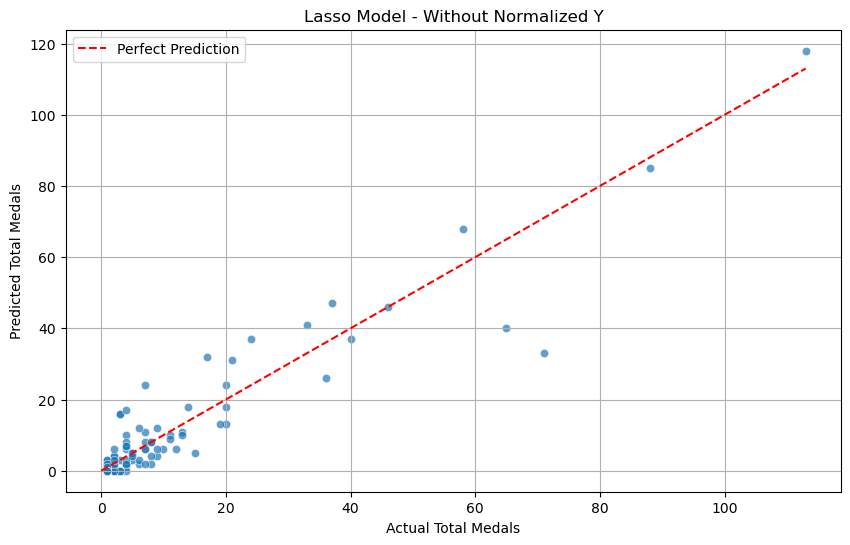

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


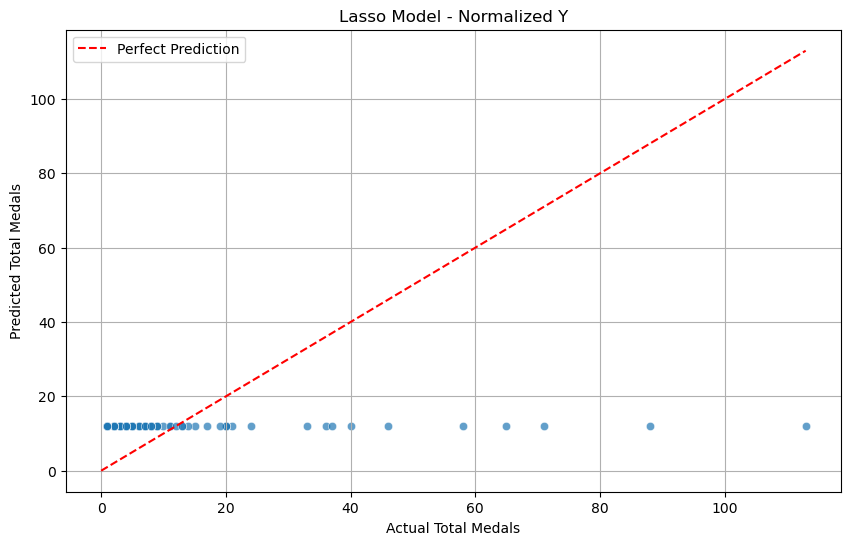

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


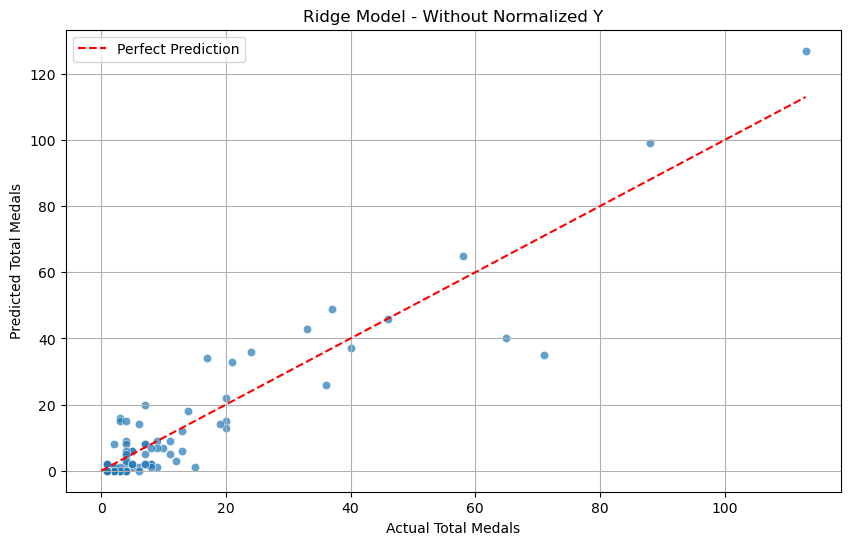

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


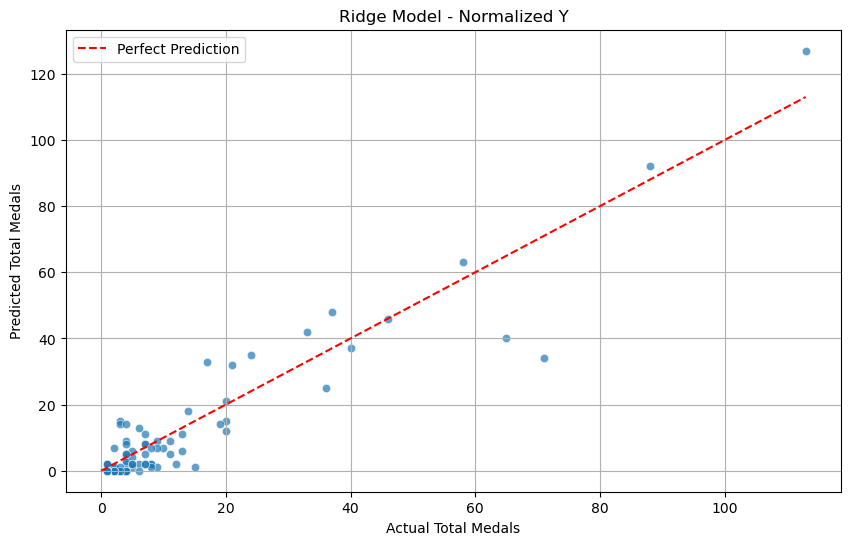

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


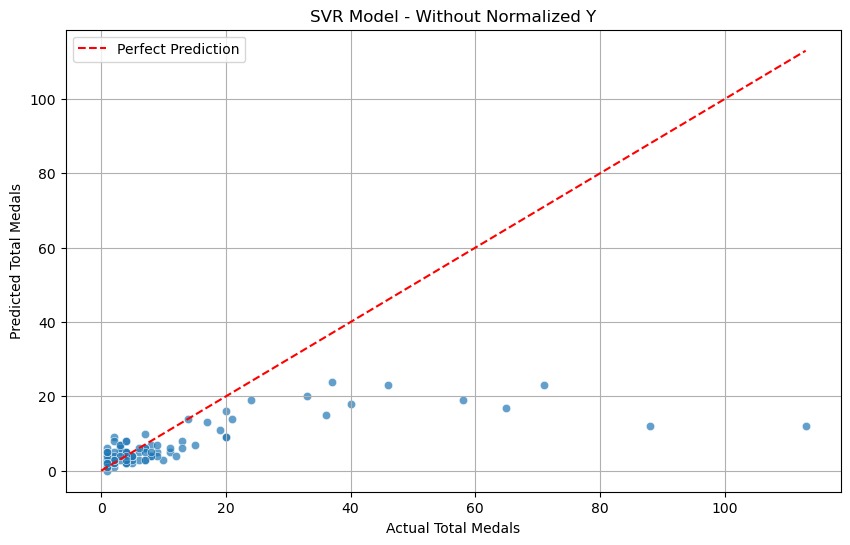

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


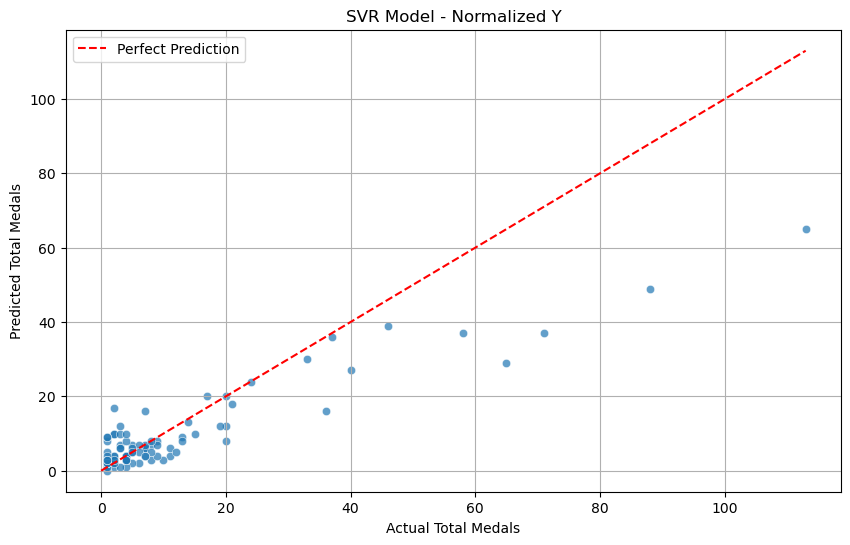

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


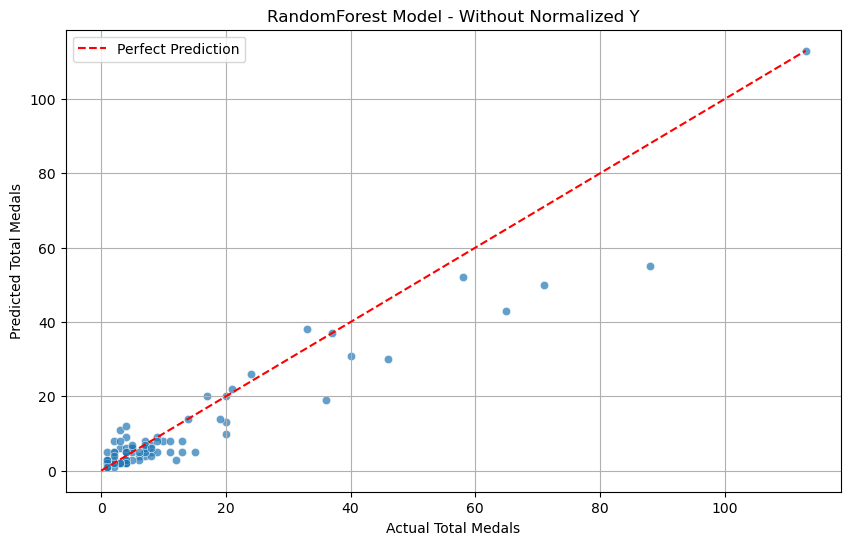

C:\Users\Asus\AppData\Local\Temp\ipykernel_19100\1647348821.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type],


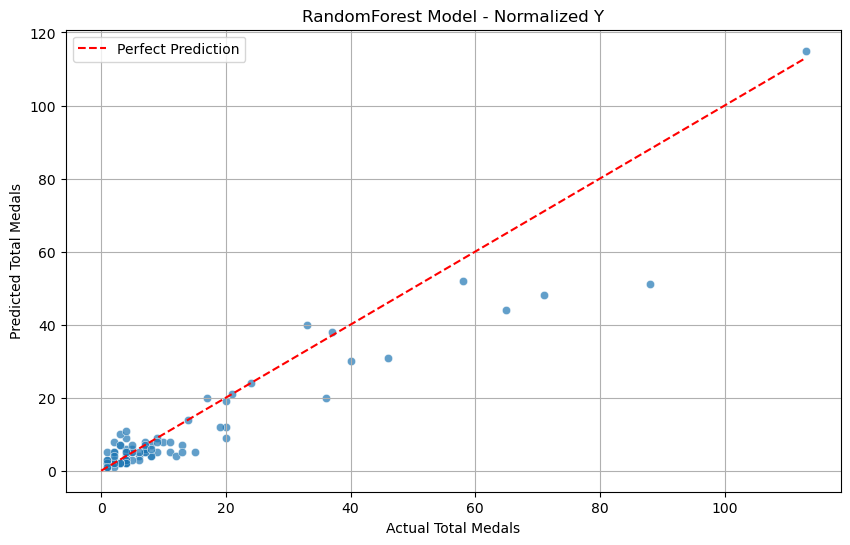

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot predictions vs actual values
def plot_predictions_vs_actual(results_df, model_name, normalization_type):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=results_df[results_df['Model'] == model_name][results_df['Normalization'] == normalization_type], 
                    x='Actual_Total_Medals', y='Predicted_Total_Medals', alpha=0.7)
    plt.plot([0, max(results_df['Actual_Total_Medals'])], [0, max(results_df['Actual_Total_Medals'])], 'r--', label='Perfect Prediction')
    plt.title(f'{model_name} Model - {normalization_type}')
    plt.xlabel('Actual Total Medals')
    plt.ylabel('Predicted Total Medals')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot results for each model and normalization case
for model_name in models.keys():
    for normalization in ['Without Normalized Y', 'Normalized Y']:
        # Plot predictions vs actual values
        plot_predictions_vs_actual(results_df, model_name, normalization)


## Conclusions 

#### Comparison Table:
| Model         | Normalization       | RMSE     | MSE        | R²       |
|---------------|---------------------|----------|------------|----------|
| Lasso         | Without Normalized Y| 7.00157  | 49.021978  | 0.866268 |
| Lasso         | Normalized Y        | 19.14692 | 366.604396 | -0.000095|
| Ridge         | Without Normalized Y| 7.37832  | 54.439560  | 0.851489 |
| Ridge         | Normalized Y        | 7.08814  | 50.241758  | 0.862941 |
| SVR           | Without Normalized Y| 16.59770 | 275.483516 | 0.248482 |
| SVR           | Normalized Y        | 9.87671  | 97.549451  | 0.733886 |
| RandomForest  | Without Normalized Y| 6.29233  | 39.593407  | 0.891989 |
| RandomForest  | Normalized Y        | 6.15817  | 37.923077  | 0.896546 |


### Analysis:

**Best RMSE:**
- RandomForest with Normalization: 6.15817  
  Lower RMSE indicates better prediction accuracy.

**Best MSE:**
- RandomForest with Normalization: 37.923077  
  Lower MSE indicates less average squared error.

**Best R²:**
- RandomForest with Normalization: 0.896546  
  Higher R² indicates a better proportion of variance explained by the model.

### Conclusion

RandomForest with normalization of Total_Medals is the best model according to RMSE, MSE, and R² values. It has the lowest RMSE and MSE and the highest R² score among all models.

Lasso with normalization performs the worst, as indicated by its high RMSE, high MSE, and very low R².
